In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [50]:
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
from scipy import stats

In [7]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [8]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df['fuelsystem'].nunique()

8

In [29]:
df=df[['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
        'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.6 KB


In [21]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

Text(0.5, 1.0, 'PDF')

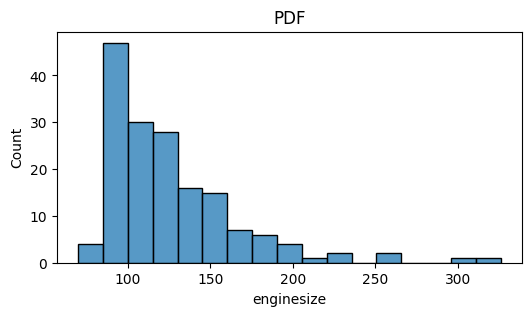

In [37]:
plt.figure(figsize=(6,3))
sns.histplot(X_train['enginesize'])
plt.title('PDF')

Text(0.5, 1.0, 'PDF')

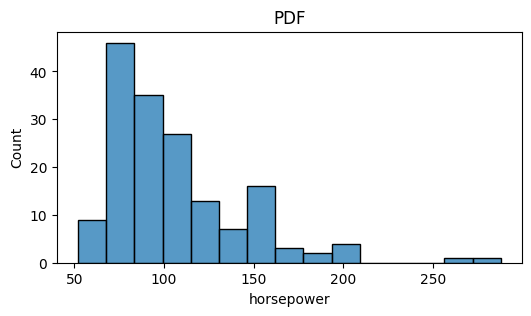

In [42]:
plt.figure(figsize=(6,3))
sns.histplot(X_train['horsepower'])
plt.title('PDF')

Text(0.5, 1.0, 'PDF')

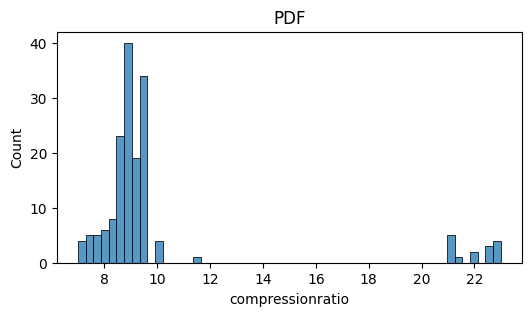

In [46]:
plt.figure(figsize=(6,3))
sns.histplot(X_train['compressionratio'])
plt.title('PDF')

Text(0.5, 1.0, 'PDF')

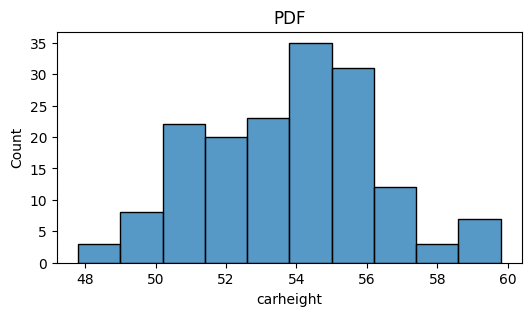

In [47]:
plt.figure(figsize=(6,3))
sns.histplot(X_train['carheight'])
plt.title('PDF')

In [33]:
df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [55]:
def apply_transform(transform):
    X=df.iloc[:,0:-1]
    y=df.iloc[:,-1]

    trf=ColumnTransformer(transformers=[
        ('log', FunctionTransformer(func=transform), ['enginesize','horsepower'])
    ], remainder='passthrough')
    
    X_trans=trf.fit_transform(X)

    reg=LinearRegression()

    print("R^2 score:", np.mean(cross_val_score(reg, X_trans, y, scoring='r2', cv=10)))
    print("MSE:", -np.mean(cross_val_score(reg, X_trans, y, scoring='neg_mean_squared_error', cv=10)))


In [56]:
apply_transform(lambda x : x)


R^2 score: 0.23919370080769312
MSE: 16271292.064326052


In [57]:
apply_transform(np.log1p)

R^2 score: 0.05488939073968356
MSE: 21531343.707570173
